# Import Libraries and Settings

In [1]:
## Import Libraries
import os
import numpy as np
import pandas as pd
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# Show current working directory
print(os.getcwd())

c:\DataAnalytics\DataAnalyticsLN\Regression


## Load the dataset

In [2]:
data = pd.read_csv('refugee_data_and_gdp.csv')

# Data Cleaning and Preparation

In [3]:
columns_to_use = ['gdp', 'male_female_ratio', 'total_refugees']
data_cleaned = data[columns_to_use].dropna()
data_cleaned = data_cleaned.reset_index(drop=True)

print("Initial Data Description:")
print(data_cleaned.describe())

Initial Data Description:
                gdp  male_female_ratio  total_refugees
count  8.830000e+02         883.000000    8.830000e+02
mean   1.407553e+12           2.909968    3.912968e+05
std    1.381673e+12           7.605946    8.875814e+05
min    0.000000e+00           0.000000    0.000000e+00
25%    2.296188e+11           1.241384    9.552000e+03
50%    7.213691e+11           1.602273    4.128200e+04
75%    2.647926e+12           2.343031    2.110410e+05
max    4.525704e+12         100.780220    4.054587e+06


# Splitting the Data

In [4]:
X = data_cleaned[['gdp', 'male_female_ratio']]
y = data_cleaned['total_refugees']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

print('X_train:')
print(X_train.head(), '\n')
print('y_train:')
print(y_train.head())

X_train:
              gdp  male_female_ratio
603  0.000000e+00           2.622419
433  6.941182e+11           1.062642
360  3.808086e+12           3.228571
355  3.808086e+12           1.629204
81   2.349796e+11           6.241379 

y_train:
603         0.0
433     34112.0
360    158908.0
355    158908.0
81       7945.0
Name: total_refugees, dtype: float64


# Fit the Regression Tree Model

In [5]:
reg_tree = DecisionTreeRegressor(random_state=42, max_depth=5)
reg_tree.fit(X_train, y_train)

# Predict with the Regression Tree
y_pred_tree = reg_tree.predict(X_test)

# Evaluate the Regression Tree
print('R-squared (Decision Tree):', round(r2_score(y_test, y_pred_tree), 4))



R-squared (Decision Tree): 0.3947


### Text representation of the regression tree

In [6]:
text_representation = tree.export_text(reg_tree, feature_names=list(X_train.columns))
print("\nText Representation of the Regression Tree:\n")
print(text_representation)


Text Representation of the Regression Tree:

|--- gdp <= 75126898688.00
|   |--- male_female_ratio <= 1.26
|   |   |--- male_female_ratio <= 1.15
|   |   |   |--- male_female_ratio <= 1.02
|   |   |   |   |--- male_female_ratio <= 1.00
|   |   |   |   |   |--- value: [1271185.48]
|   |   |   |   |--- male_female_ratio >  1.00
|   |   |   |   |   |--- value: [3971554.67]
|   |   |   |--- male_female_ratio >  1.02
|   |   |   |   |--- male_female_ratio <= 1.11
|   |   |   |   |   |--- value: [861987.27]
|   |   |   |   |--- male_female_ratio >  1.11
|   |   |   |   |   |--- value: [133753.40]
|   |   |--- male_female_ratio >  1.15
|   |   |   |--- male_female_ratio <= 1.19
|   |   |   |   |--- male_female_ratio <= 1.15
|   |   |   |   |   |--- value: [3805612.50]
|   |   |   |   |--- male_female_ratio >  1.15
|   |   |   |   |   |--- value: [3975876.83]
|   |   |   |--- male_female_ratio >  1.19
|   |   |   |   |--- male_female_ratio <= 1.20
|   |   |   |   |   |--- value: [1685615.00]


### Visualizstion of the Regression Tree

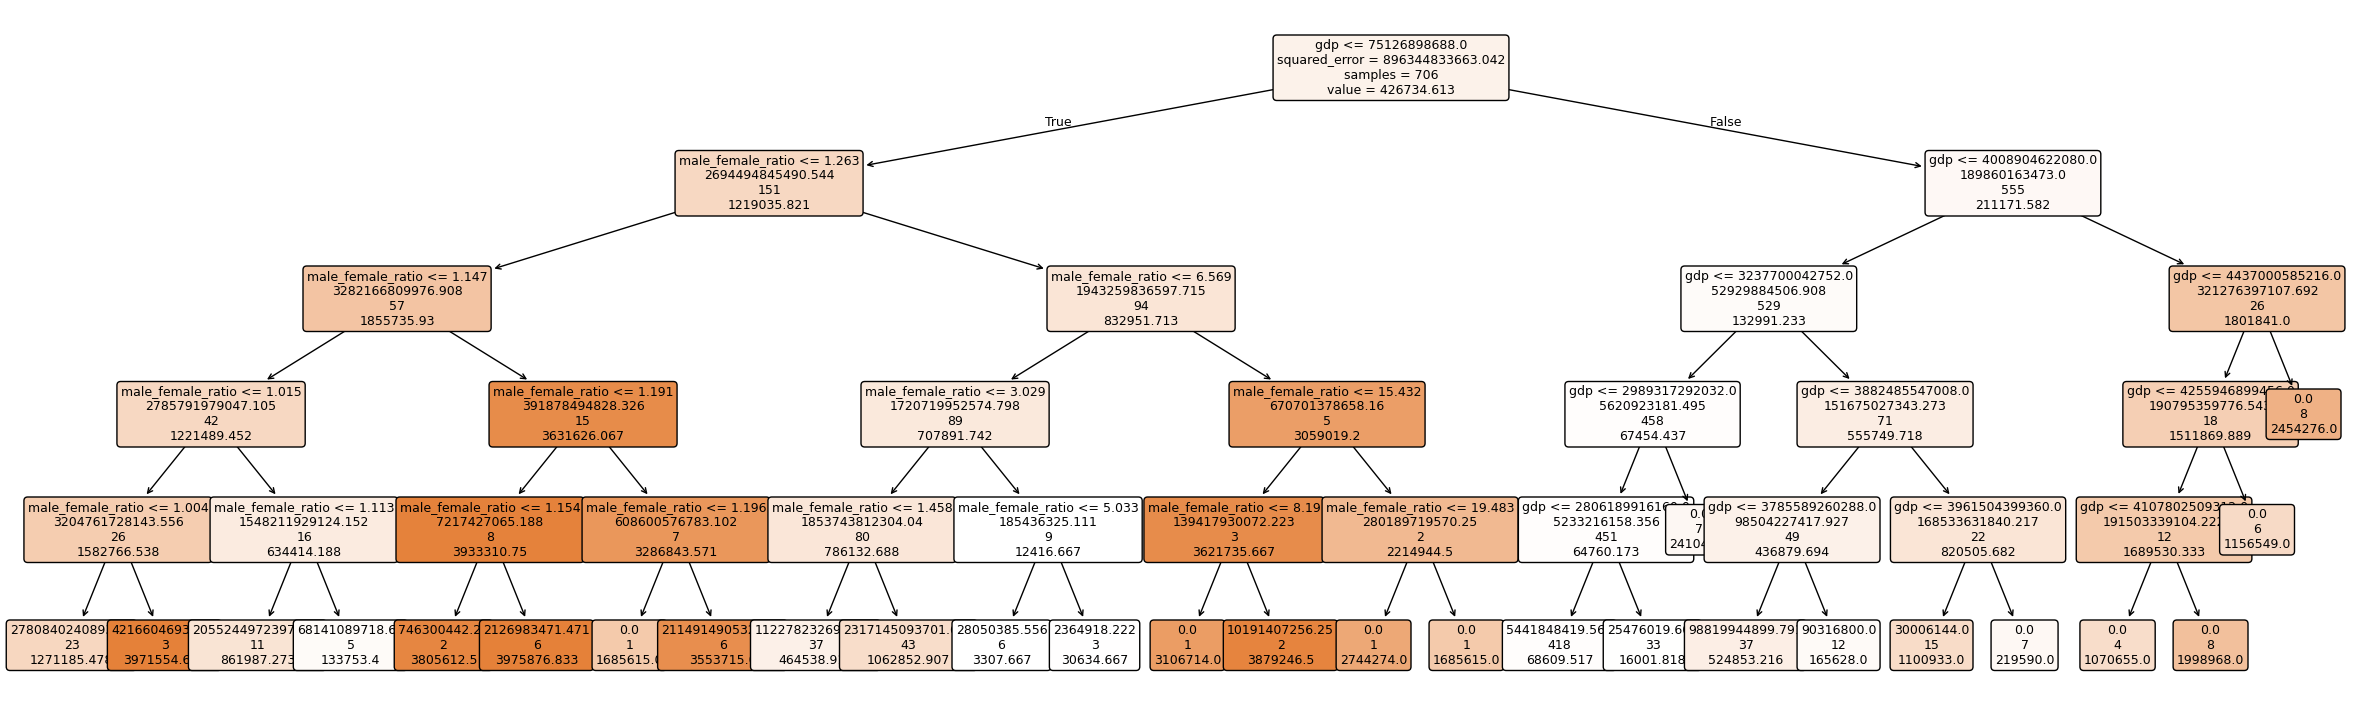

In [7]:
fig = plt.figure(figsize=(30, 9))
_ = tree.plot_tree(reg_tree, 
                   feature_names=list(X_train.columns),  
                   filled=True, 
                   fontsize=9, 
                   label='root', 
                   rounded=True)
plt.show()

## Create Train and Test Samples for Random Forest

In [8]:
X2_train, X2_test, y2_train, y2_test = train_test_split(data_cleaned[['gdp', 'male_female_ratio']], 
                                                        data_cleaned['total_refugees'], 
                                                        test_size=0.20, 
                                                        random_state=42)

print('X2_train:')
print(X2_train.head(), '\n')
print('y2_train:')
print(y2_train.head())


X2_train:
              gdp  male_female_ratio
603  0.000000e+00           2.622419
433  6.941182e+11           1.062642
360  3.808086e+12           3.228571
355  3.808086e+12           1.629204
81   2.349796e+11           6.241379 

y2_train:
603         0.0
433     34112.0
360    158908.0
355    158908.0
81       7945.0
Name: total_refugees, dtype: float64


##### Fit the Random Forest Regression

In [9]:
reg_rf = RandomForestRegressor(n_estimators=500, max_depth=10, random_state=42)
reg_rf.fit(X2_train, y2_train)

RandomForestRegressor(max_depth=10, n_estimators=500, random_state=42)

##### Predict and Evaluate Random Forest

In [10]:
y2_pred = reg_rf.predict(X2_test)
print('R-squared (Random Forest):', round(reg_rf.score(X2_test, y2_test), 4))

R-squared (Random Forest): 0.3718


#### Feature Importance from Random Forest

In [11]:
cols = X2_train.columns
importances = reg_rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Print Feature Importances
print('Feature Importances (Random Forest):')
for f in range(X2_train.shape[1]):
    print(f"{cols[indices[f]]}: {importances[indices[f]]:.4f}")


Feature Importances (Random Forest):
male_female_ratio: 0.6215
gdp: 0.3785


#### Plot Feature Importance

<Figure size 600x300 with 0 Axes>

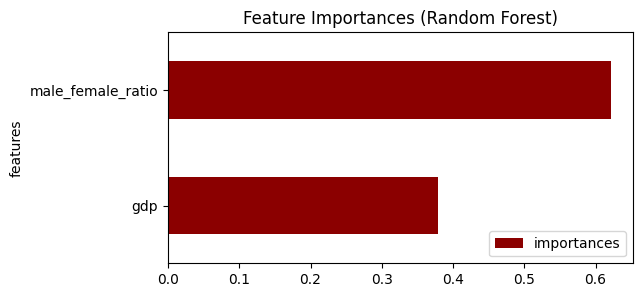

In [12]:
plt.figure(figsize=(6, 3))
df_fi = pd.DataFrame({'features': cols, 'importances': importances})
df_fi.sort_values('importances', inplace=True)
df_fi.plot(kind='barh', 
           y='importances', 
           x='features', 
           color='darkred', 
           figsize=(6, 3))
plt.title('Feature Importances (Random Forest)')
plt.show()


## Dropping Variables and Re-Training

In [13]:
# Dropped "gdp" to observe model changes
X3_train, X3_test, y3_train, y3_test = train_test_split(data_cleaned[['male_female_ratio']], 
                                                        data_cleaned['total_refugees'], 
                                                        test_size=0.20, 
                                                        random_state=42)

print('X3_train:')
print(X3_train.head(), '\n')
print('y3_train:')
print(y3_train.head())

X3_train:
     male_female_ratio
603           2.622419
433           1.062642
360           3.228571
355           1.629204
81            6.241379 

y3_train:
603         0.0
433     34112.0
360    158908.0
355    158908.0
81       7945.0
Name: total_refugees, dtype: float64


##### Fit the Reduced Random Forest Model

In [14]:
reg_rf3 = RandomForestRegressor(n_estimators=500, max_depth=10, random_state=42)
reg_rf3.fit(X3_train, y3_train)


RandomForestRegressor(max_depth=10, n_estimators=500, random_state=42)

##### Evaluate Reduced Random Forest Model

In [15]:
print('R-squared (Reduced Random Forest):', round(reg_rf3.score(X3_test, y3_test), 4))

R-squared (Reduced Random Forest): -0.6991


## Additional Features and Re-Test

In [16]:
X4_train, X4_test, y4_train, y4_test = train_test_split(data_cleaned[['gdp', 'male_female_ratio']], 
                                                        data_cleaned['total_refugees'], 
                                                        test_size=0.20, 
                                                        random_state=42)

print('X4_train:')
print(X4_train.head(), '\n')
print('y4_train:')
print(y4_train.head())


X4_train:
              gdp  male_female_ratio
603  0.000000e+00           2.622419
433  6.941182e+11           1.062642
360  3.808086e+12           3.228571
355  3.808086e+12           1.629204
81   2.349796e+11           6.241379 

y4_train:
603         0.0
433     34112.0
360    158908.0
355    158908.0
81       7945.0
Name: total_refugees, dtype: float64


##### Fit the Enhanced Random Forest Model

In [17]:
reg_rf4 = RandomForestRegressor(n_estimators=500, max_depth=10, random_state=42)
reg_rf4.fit(X4_train, y4_train)

RandomForestRegressor(max_depth=10, n_estimators=500, random_state=42)

##### Evaluate Enhanced Random Forest Model

In [18]:
print('R-squared (Enhanced Random Forest):', round(reg_rf4.score(X4_test, y4_test), 4))


R-squared (Enhanced Random Forest): 0.3718


### Feature Importance of Enhanced Model

In [19]:
cols4 = X4_train.columns
importances4 = reg_rf4.feature_importances_
indices4 = np.argsort(importances4)[::-1]

print('Feature Importances (Enhanced Random Forest):')
for f in range(X4_train.shape[1]):
    print(f"{cols4[indices4[f]]}: {importances4[indices4[f]]:.4f}")

Feature Importances (Enhanced Random Forest):
male_female_ratio: 0.6215
gdp: 0.3785


### Bar Plot for Enhanced Model

<Figure size 600x300 with 0 Axes>

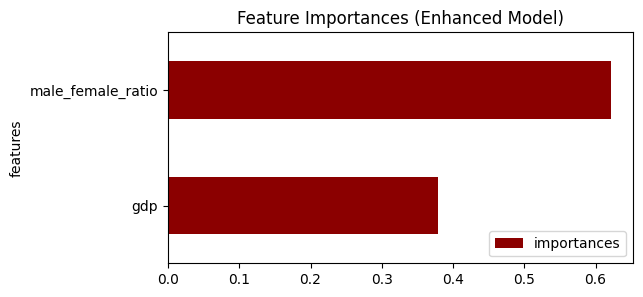

In [20]:
plt.figure(figsize=(6, 3))
df_fi4 = pd.DataFrame({'features': cols4, 'importances': importances4})
df_fi4.sort_values('importances', inplace=True)
df_fi4.plot(kind='barh', 
           y='importances', 
           x='features', 
           color='darkred', 
           figsize=(6, 3))
plt.title('Feature Importances (Enhanced Model)')
plt.show()

In [21]:
# Footer Info
from datetime import datetime
print('-----------------------------------')
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('-----------------------------------')

-----------------------------------
Datetime: 2025-01-02 18:43:15
-----------------------------------
